# CMS Hospital Rating

# Fun Facts:
## The probability of picking a 5-star rating hospital in the USA that is from Texas  is 0.35%.
## The probability of picking a 1-star rating hospital in the USA that is from New York  is 1.1%.

# Description:
### It is every hospital's dream to have a 5-star rating as it signifies the level of patient-care quality provided. The rating is one of many ways to showcase quality recognition and reputation. The dataset by Centers of Medicare and Medicaid, was downloaded on Kaggle dataset. This data can help us compare the quality  of care among hospitals in the USA. This is an interesting project as the data can be used for predictive modeling using Python. The result of the machine learning algorithms can have implications: 

### *Hospitals - better resource-allocation strategy
### *Insurance - improve overall policies/practices and network coverage strategy
### *Patients - better understanding of their healthcare facilities and makes informed decision

# Project Objective:
### The objective of this project is to predict the hospital's rating, thus, the target variable or the y-variable is "Hospital overall rating".

# Techniques:
### The project included comprehensive exploratory data analysis, data cleansing, and data visualization. Multiclass predictive models using machine learning from sci-kit learn libraries included K-nearest neighbor, Support Vector Machines, and Random Forest. The end result included the comparison of these models' performance. 

###  Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Opening and reading downloaded dataset

In [2]:
data = pd.read_csv("../input/cms-ratingcsv/Hospital General Information.csv")

In [3]:
data.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN


### Checking out the info on dataset to see what am I dealing with. Noted that features ending with *footnote have low non-null values. Almost all are objects except for provider ID, ZIP code, and phone numbers are numbers, which makes sense. The dataset is categorical-heavy. This means categorical graphs will be used frequently during the exploratory data analysis. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

### Checking out the total null counts helps me decide if they should be dropped completely or replaced with relevant values. 

In [5]:
data.isnull().sum()

Provider ID                                                         0
Hospital Name                                                       0
Address                                                             0
City                                                                0
State                                                               0
ZIP Code                                                            0
County Name                                                        15
Phone Number                                                        0
Hospital Type                                                       0
Hospital Ownership                                                  0
Emergency Services                                                  0
Meets criteria for meaningful use of EHRs                         143
Hospital overall rating                                             0
Hospital overall rating footnote                                 3414
Mortality national c

###  Diving in to see what is in *footnote - Mostly description, not very informational in our work here. 

In [6]:
data["Hospital overall rating footnote"].value_counts()

There are too few measures or measure groups reported to calculate a star rating or measure group score                                        995
Data are shown only for hospitals that participate in the Inpatient Quality Reporting (IQR) and Outpatient Quality Reporting (OQR) programs    159
This hospital�s star rating only includes data reported on inpatient services                                                                  153
Data suppressed by CMS for one or more quarters                                                                                                 49
Results are not available for this reporting period                                                                                             42
Name: Hospital overall rating footnote, dtype: int64

###  Those *footnote features will be droppedsince the information is not relevant to this project.

In [7]:
data = data.drop(["Hospital overall rating footnote", "Mortality national comparison footnote", 
          "Safety of care national comparison footnote", "Readmission national comparison footnote",
         "Readmission national comparison footnote", "Patient experience national comparison footnote",
         "Effectiveness of care national comparison footnote", "Timeliness of care national comparison footnote",
         "Efficient use of medical imaging national comparison footnote"], axis=1)

### Rechecking what is left - The length of the dataset is ~4800. I have decided to just drop the 15 null values on county name. Need to look into "Meets criteria for meaningful use of EHRs" and decide if dropping 143 null values will make sense. 

In [8]:
data.isnull().sum()

Provider ID                                               0
Hospital Name                                             0
Address                                                   0
City                                                      0
State                                                     0
ZIP Code                                                  0
County Name                                              15
Phone Number                                              0
Hospital Type                                             0
Hospital Ownership                                        0
Emergency Services                                        0
Meets criteria for meaningful use of EHRs               143
Hospital overall rating                                   0
Mortality national comparison                             0
Safety of care national comparison                        0
Readmission national comparison                           0
Patient experience national comparison  

In [9]:
data["Meets criteria for meaningful use of EHRs"].value_counts()

Y                4668
Not Available       1
Name: Meets criteria for meaningful use of EHRs, dtype: int64

### Almost 90% of the data for feature "Meets criteria for meaningful use of EHR" is Yes and 1 is Not Available. I will just drop this feature since the data is not too helpful. 

In [10]:
data = data.dropna()
data.isnull().sum()

Provider ID                                             0
Hospital Name                                           0
Address                                                 0
City                                                    0
State                                                   0
ZIP Code                                                0
County Name                                             0
Phone Number                                            0
Hospital Type                                           0
Hospital Ownership                                      0
Emergency Services                                      0
Meets criteria for meaningful use of EHRs               0
Hospital overall rating                                 0
Mortality national comparison                           0
Safety of care national comparison                      0
Readmission national comparison                         0
Patient experience national comparison                  0
Effectiveness 

# The exploratory data analysis begins here. The features listed in the top line will be used as my roadmap for exploration. First, I will do a basic descriptive analysis. 

In [11]:
data.describe()

,Provider ID,ZIP Code,Phone Number
count,4655.000000,4655.000000,4.655000e+03
mean,266722.448335,53780.188614,5.849839e+09
std,154614.918602,26804.881596,2.328346e+09
min,10001.000000,603.000000,9.369338e+08
25%,140194.000000,32995.000000,4.017335e+09
50%,260011.000000,55066.000000,6.053844e+09
75%,390179.500000,75818.000000,7.877360e+09
max,670114.000000,99901.000000,9.898943e+09


### The descriptive analysis does not help much. The "State" column gives us the geographical location information instead of ZIP code. I suspect Provider ID is a unique feature (primary key). Phone numbers don't help much. Planned to drop Provider ID if this feature is used as unique identifier, which is not helpful in the project. Also will drop phone numbers and Zip code. 

In [12]:
data["Provider ID"].nunique()

4655

### My dropping list now contains Provider ID, Phone Number, and Meets criteria for meaningful use of EHRs. Let's check county name if it is a useful feature.

In [13]:
data["County Name"].value_counts()

LOS ANGELES    79
COOK           51
JEFFERSON      46
WASHINGTON     43
MONTGOMERY     41
               ..
BAYLOR          1
OLDHAM          1
TIPPAH          1
CERRO GORDO     1
WHATCOM         1
Name: County Name, Length: 1547, dtype: int64

### The County Name feature has length of ~1500. It is not feasible to keep this feature in our machine learning process later. Planned to drop this feature. ZIP code counts below shows length of ~4000, which is also not feasible to keep. My dropping list now contains ZIP code, county name, provider ID, phone numbers, and EHRs.  

In [14]:
data["ZIP Code"].value_counts()

77030    6
76104    5
70508    4
75231    4
75093    4
        ..
39730    1
4915     1
73438    1
62263    1
18431    1
Name: ZIP Code, Length: 4298, dtype: int64

In [15]:
data = data.drop(["County Name", "ZIP Code", "Meets criteria for meaningful use of EHRs", 
                  "Provider ID", "Phone Number"], axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4655 entries, 0 to 4803
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Hospital Name                                         4655 non-null   object
 1   Address                                               4655 non-null   object
 2   City                                                  4655 non-null   object
 3   State                                                 4655 non-null   object
 4   Hospital Type                                         4655 non-null   object
 5   Hospital Ownership                                    4655 non-null   object
 6   Emergency Services                                    4655 non-null   object
 7   Hospital overall rating                               4655 non-null   object
 8   Mortality national comparison                         4655 non-null 

### There are a few more features to consider dropping before moving to the core areas - Hospital Name and Address. I'm not too sure if these features are useful in this project. Noted that all the data now is of object type. 

In [17]:
data["Hospital Name"].value_counts()

MEMORIAL HOSPITAL                      15
GOOD SAMARITAN HOSPITAL                 7
COMMUNITY MEMORIAL HOSPITAL             7
ST JOSEPH HOSPITAL                      7
MEMORIAL MEDICAL CENTER                 6
                                       ..
DOUGLAS COUNTY HOSPITAL                 1
BOCA RATON REGIONAL HOSPITAL            1
PHILLIPS COUNTY MEDICAL CENTER          1
MUNSON HEALTHCARE GRAYLING HOSPITAL     1
COZAD COMMUNITY HOSPITAL                1
Name: Hospital Name, Length: 4473, dtype: int64

In [18]:
data["Address"].value_counts()

100 HOSPITAL DRIVE                     7
200 HOSPITAL DRIVE                     4
100 MEDICAL CENTER DRIVE               4
ONE HOSPITAL DRIVE                     3
1000 MEDICAL CENTER DRIVE              2
                                      ..
161 HOSPITAL DRIVE                     1
4500 13TH ST-P O BOX 1810              1
530 SOUTH JACKSON STREET               1
202 NORTH DIVISION STREET PLAZA ONE    1
301 BECKER AVE SW                      1
Name: Address, Length: 4628, dtype: int64

In [19]:
data = data.drop(["Address", "Hospital Name"], axis=1)

## Exploratory Data Analysis

In [20]:
data["Hospital Type"].value_counts()

Acute Care Hospitals         3256
Critical Access Hospitals    1308
Childrens                      91
Name: Hospital Type, dtype: int64

###### The majority of the hospitals in the USA are acute care hospitals, followed by critical access, and children. 

<AxesSubplot:xlabel='Hospital Type', ylabel='count'>

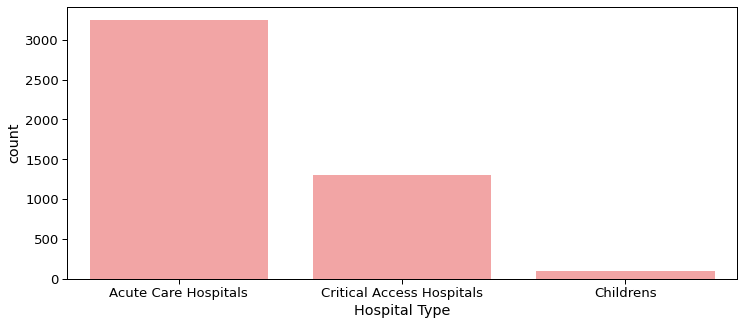

In [21]:
plt.figure(figsize=(12,5))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x=data["Hospital Type"], data=data, color="red", alpha=0.4)

In [22]:
data["Emergency Services"].value_counts()

Yes    4398
No      257
Name: Emergency Services, dtype: int64

###### The majority of the acute care hospitals and critical access have some sort of Emergency Services, unlike children's hospital. This makes sense as children's hospital is a specialty, usually affiliated with large acute care hospital in health systems. 

<AxesSubplot:xlabel='Hospital Type', ylabel='count'>

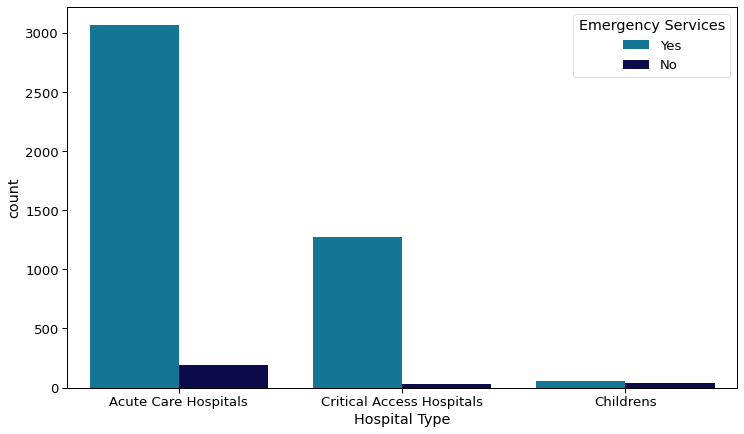

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(x="Hospital Type", data=data, hue="Emergency Services", palette="ocean_r")

<AxesSubplot:xlabel='Emergency Services', ylabel='count'>

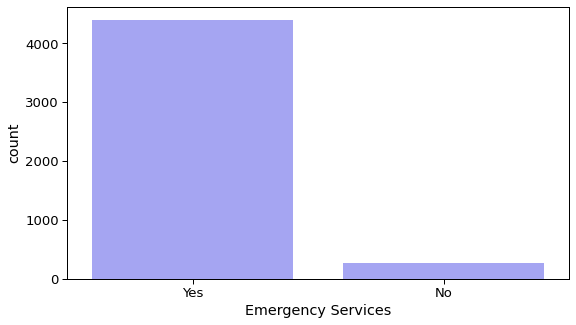

In [24]:
plt.figure(figsize=(9,5))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="Emergency Services", data=data, color="blue", alpha=0.4)

In [25]:
data["Hospital Ownership"].value_counts()

Voluntary non-profit - Private                 2003
Proprietary                                     753
Government - Hospital District or Authority     544
Voluntary non-profit - Other                    456
Government - Local                              392
Voluntary non-profit - Church                   341
Government - State                               60
Physician                                        55
Government - Federal                             42
Tribal                                            9
Name: Hospital Ownership, dtype: int64

### The majority of the hospitals in the USA is private non-profit, government and faith-based. This is followed by physician-owned hospitals and tribal-owned bottoms the list. It is probably due to the total population of the tribes is relatively low compared to the non-tribes. The supply and demand laws in healthcare applies here.  

<AxesSubplot:xlabel='count', ylabel='Hospital Ownership'>

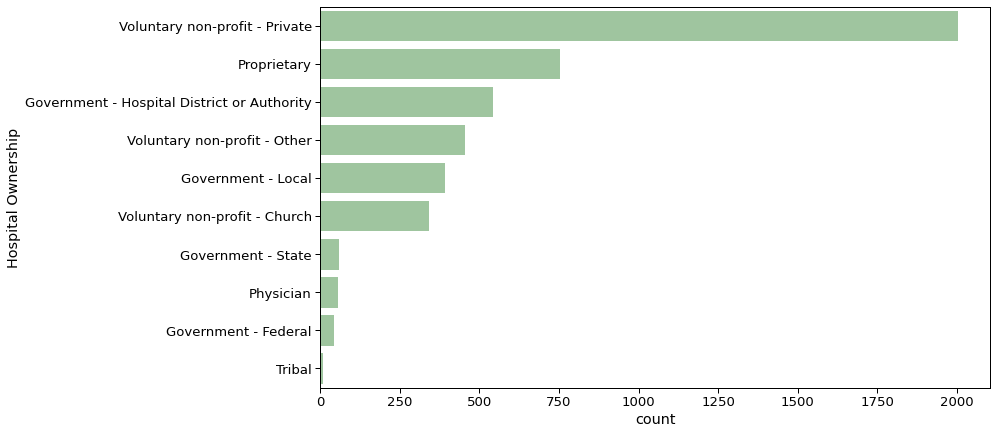

In [26]:
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.5)
order = data["Hospital Ownership"].value_counts().sort_values(ascending=False).index
sns.countplot(y="Hospital Ownership", data=data, color="green", alpha=0.4, order=order)

In [27]:
data["Hospital Ownership"].value_counts(normalize=True)*100

Voluntary non-profit - Private                 43.029001
Proprietary                                    16.176155
Government - Hospital District or Authority    11.686359
Voluntary non-profit - Other                    9.795918
Government - Local                              8.421053
Voluntary non-profit - Church                   7.325456
Government - State                              1.288937
Physician                                       1.181525
Government - Federal                            0.902256
Tribal                                          0.193340
Name: Hospital Ownership, dtype: float64

In [28]:
data["Hospital overall rating"].value_counts()

3                1751
Not Available    1113
4                 931
2                 672
1                 107
5                  81
Name: Hospital overall rating, dtype: int64

### Planned to drop the Not Available even though its count is significant. Replacing it with the mean value does not provide us an accurate picture, which is representative of the hospital rating in this country. 

In [29]:
data = data.drop(data[data["Hospital overall rating"] == "Not Available"].index)

In [30]:
data["Hospital overall rating"].value_counts(normalize=True)*100

3    49.435347
4    26.284585
2    18.972332
1     3.020892
5     2.286844
Name: Hospital overall rating, dtype: float64

###### As expected, the majority of the hospitals in the USA falls under the average rating of 3 (49%). The extreme rating 1 and 5, with 5 being the best rating, have the lowest percentages. This is expected as it shows a very small number of hospitals  (3%) are actually under-performed and it is very difficult for hospitals to obtain 5-star rating (only 2%) as performance is based on CMS value-based programs and so forth. At this stage, it is hard to tell if hospitals have resources constraints as the barrier versus CMS requirements are too high. 

<AxesSubplot:xlabel='Hospital overall rating', ylabel='count'>

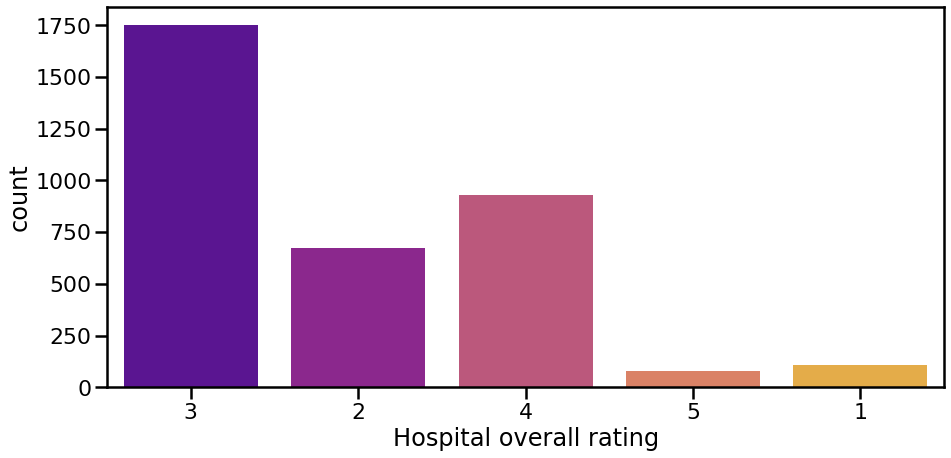

In [31]:
plt.figure(figsize=(15,7))
sns.set_context("poster", font_scale=1)
sns.countplot(x=data["Hospital overall rating"], palette="plasma")

### Based on the graph above, it is safe to assume that the majority of the hospitals in the USA lean toward average to higher rating (average performers and over-achievers) with smaller percentage of them on the low-end side. In general, hospitals are performing better than worse based on CMS requirements with only abur less than a quarter ~21% are under=performing. This does not reflect the true picture of the current hospital performance; over-time tracking is required to see if hospitals are improving or declining. 

### Continuing analysis - will drop Not Available counts in all features. 

In [32]:
data["Mortality national comparison"].value_counts()

Same as the national average    2575
Above the national average       400
Below the national average       340
Not Available                    227
Name: Mortality national comparison, dtype: int64

In [33]:
data = data.drop(data[data["Mortality national comparison"] == "Not Available"].index)

In [34]:
data["Mortality national comparison"].value_counts(normalize=True)*100

Same as the national average    77.677225
Above the national average      12.066365
Below the national average      10.256410
Name: Mortality national comparison, dtype: float64

<AxesSubplot:xlabel='Mortality national comparison', ylabel='count'>

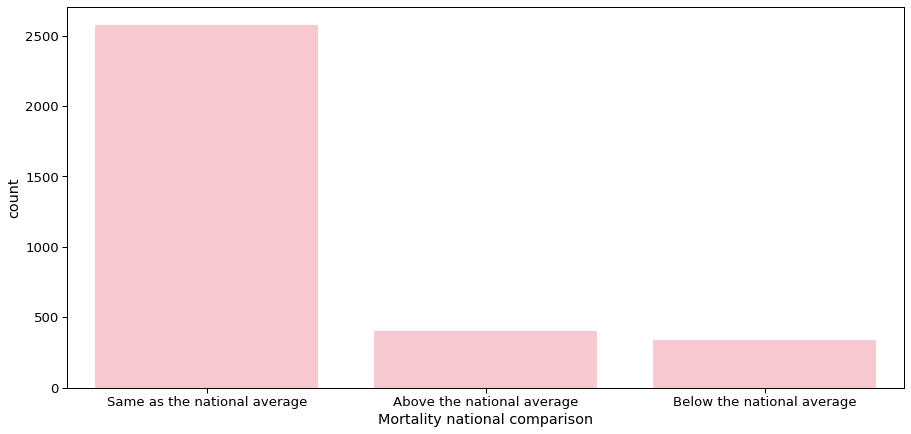

In [35]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=1.5)
mortality_order = data["Mortality national comparison"].value_counts().sort_values(ascending=False).index
sns.countplot(x=data["Mortality national comparison"], color="pink", order=mortality_order)

In [36]:
data["Safety of care national comparison"].value_counts()

Same as the national average    1109
Not Available                    781
Above the national average       770
Below the national average       655
Name: Safety of care national comparison, dtype: int64

In [37]:
data = data.drop(data[data["Safety of care national comparison"] == "Not Available"].index)

In [38]:
data["Safety of care national comparison"].value_counts(normalize=True)*100

Same as the national average    43.764799
Above the national average      30.386740
Below the national average      25.848461
Name: Safety of care national comparison, dtype: float64

<AxesSubplot:xlabel='Safety of care national comparison', ylabel='count'>

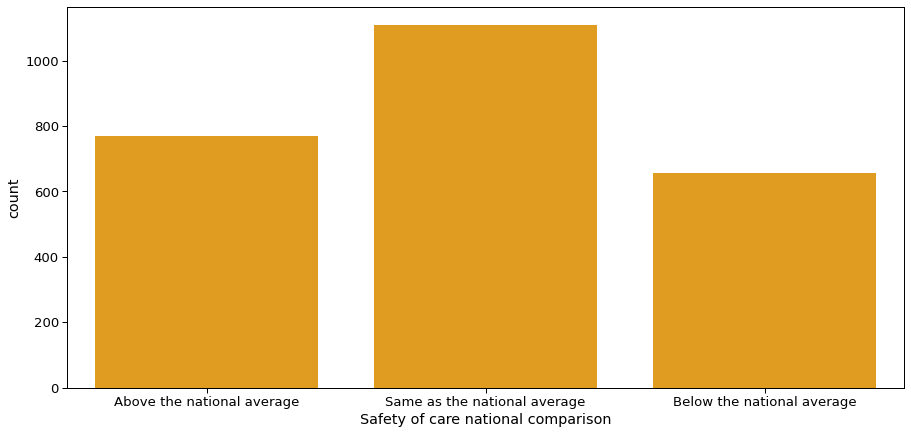

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Safety of care national comparison"], color="orange")

In [40]:
data["Readmission national comparison"].value_counts()

Same as the national average    961
Below the national average      807
Above the national average      766
Name: Readmission national comparison, dtype: int64

<AxesSubplot:xlabel='Readmission national comparison', ylabel='count'>

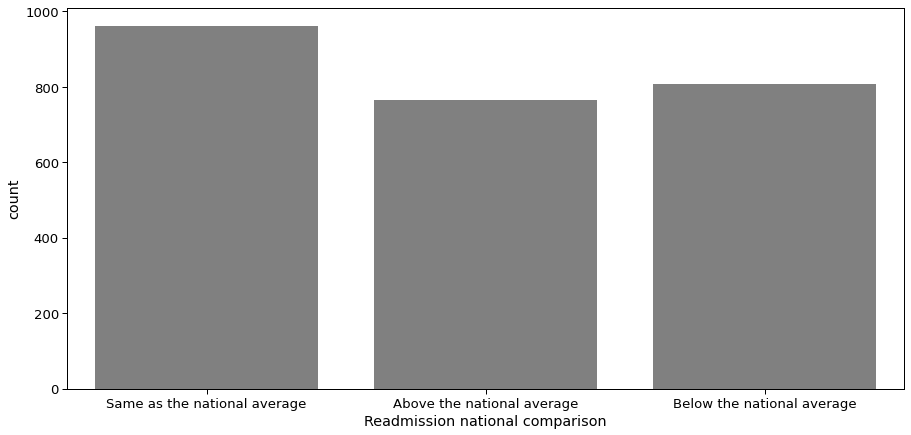

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Readmission national comparison"], color="grey")

In [42]:
data["Patient experience national comparison"].value_counts()

Below the national average      986
Same as the national average    837
Above the national average      703
Not Available                     8
Name: Patient experience national comparison, dtype: int64

In [43]:
data = data.drop(data[data["Patient experience national comparison"] == "Not Available"].index)

In [44]:
data["Patient experience national comparison"].value_counts(normalize=True)*100

Below the national average      39.034046
Same as the national average    33.135392
Above the national average      27.830562
Name: Patient experience national comparison, dtype: float64

<AxesSubplot:xlabel='Patient experience national comparison', ylabel='count'>

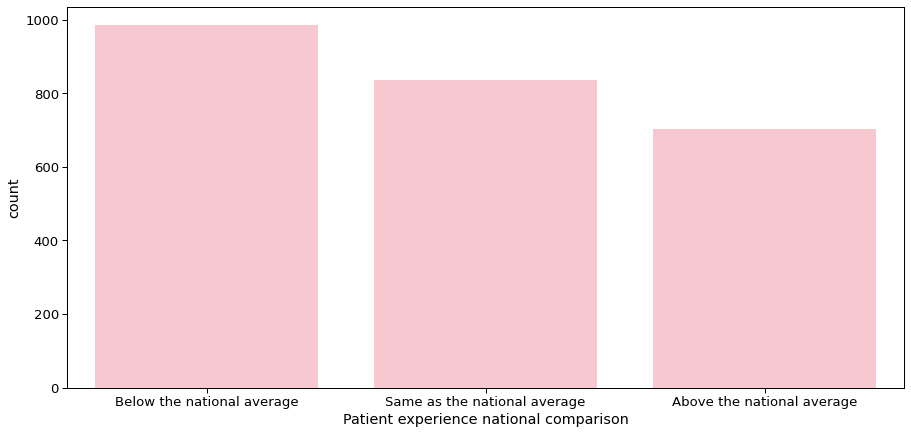

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Patient experience national comparison"], color="pink")

In [46]:
data["Effectiveness of care national comparison"].value_counts()

Same as the national average    2231
Below the national average       166
Above the national average       124
Not Available                      5
Name: Effectiveness of care national comparison, dtype: int64

In [47]:
data = data.drop(data[data["Effectiveness of care national comparison"] == "Not Available"].index)

In [48]:
data["Effectiveness of care national comparison"].value_counts(normalize=True)*100

Same as the national average    88.496628
Below the national average       6.584689
Above the national average       4.918683
Name: Effectiveness of care national comparison, dtype: float64

<AxesSubplot:xlabel='Effectiveness of care national comparison', ylabel='count'>

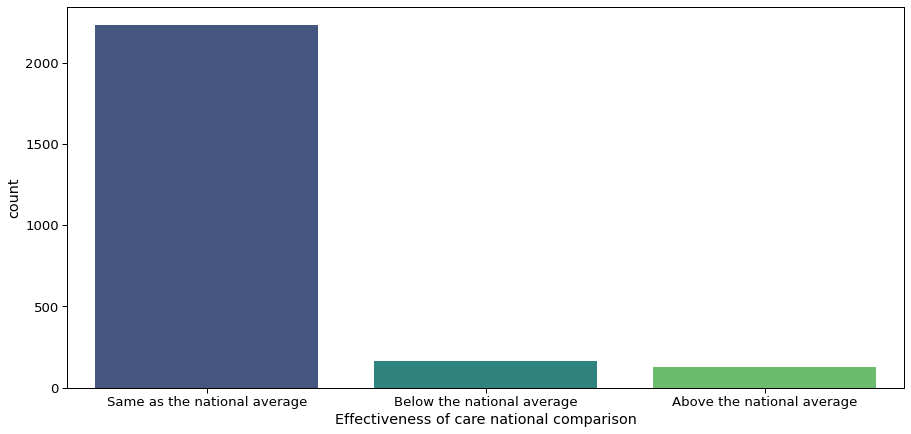

In [49]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Effectiveness of care national comparison"], palette="viridis")

In [50]:
data["Timeliness of care national comparison"].value_counts()

Same as the national average    1033
Below the national average       872
Above the national average       604
Not Available                     12
Name: Timeliness of care national comparison, dtype: int64

In [51]:
data = data.drop(data[data["Timeliness of care national comparison"] == "Not Available"].index)

In [52]:
data["Timeliness of care national comparison"].value_counts(normalize=True)*100

Same as the national average    41.171782
Below the national average      34.754882
Above the national average      24.073336
Name: Timeliness of care national comparison, dtype: float64

<AxesSubplot:xlabel='Timeliness of care national comparison', ylabel='count'>

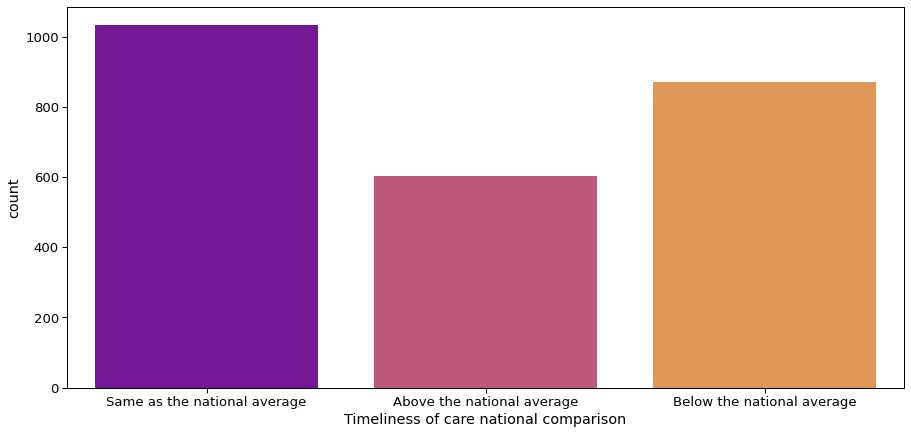

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Timeliness of care national comparison"], palette="plasma")

In [54]:
data["Efficient use of medical imaging national comparison"].value_counts()

Same as the national average    1635
Above the national average       356
Below the national average       306
Not Available                    212
Name: Efficient use of medical imaging national comparison, dtype: int64

In [55]:
data = data.drop(data[data["Efficient use of medical imaging national comparison"] == "Not Available"].index)

In [56]:
data["Efficient use of medical imaging national comparison"].value_counts(normalize=True)*100

Same as the national average    71.179800
Above the national average      15.498476
Below the national average      13.321724
Name: Efficient use of medical imaging national comparison, dtype: float64

<AxesSubplot:xlabel='Efficient use of medical imaging national comparison', ylabel='count'>

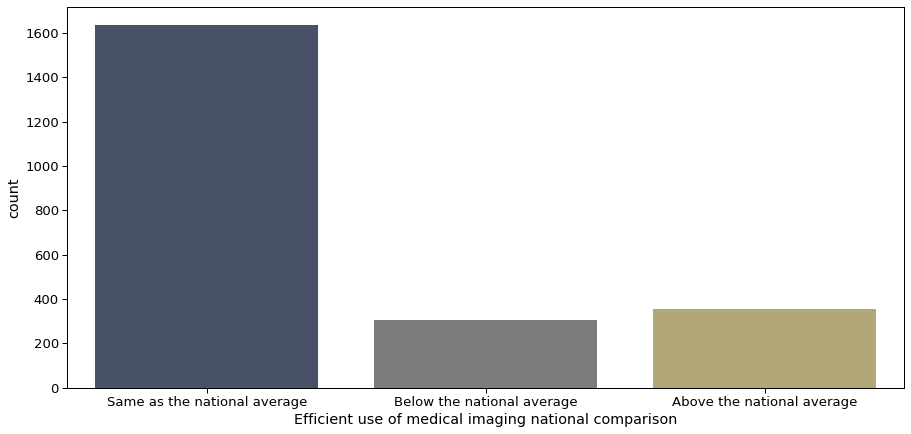

In [57]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Efficient use of medical imaging national comparison"], palette="cividis")

### Explorative data analysis on CMS measures are complete. Need to drilldown in the basics before moving on to machine learning. 

In [58]:
data["City"].value_counts()

CHICAGO         18
HOUSTON         13
PHILADELPHIA    12
COLUMBUS        10
GREENVILLE      10
                ..
MACOMB           1
LA JOLLA         1
MARTINSVILLE     1
WILLINGBORO      1
BLAIRSVILLE      1
Name: City, Length: 1474, dtype: int64

### The City data length has ~1400 and it is not feasible to create dummies to keep this feature. Putting them into fewer categories is not necessary as we have State as the location.  

In [59]:
data = data.drop("City", axis=1)

In [60]:
data["State"].value_counts(normalize=True)*100

CA    7.575098
TX    7.139747
FL    6.181976
PA    4.832390
NY    4.788855
IL    4.658250
OH    4.614715
MI    3.569874
NC    3.134523
GA    3.090988
IN    2.873313
VA    2.742708
TN    2.655638
MO    2.568568
NJ    2.525033
WI    2.481498
KY    2.263822
MA    2.176752
AL    2.133217
WA    1.915542
LA    1.828472
OK    1.828472
SC    1.784937
AZ    1.697867
CO    1.610797
MN    1.567262
MS    1.436657
KS    1.262516
CT    1.175446
AR    1.175446
OR    1.131911
IA    1.088376
WV    1.001306
NV    0.740096
ME    0.696561
NE    0.696561
UT    0.696561
NM    0.609491
NH    0.522421
MT    0.435350
ID    0.435350
SD    0.435350
RI    0.391815
HI    0.348280
DC    0.304745
DE    0.261210
ND    0.261210
VT    0.261210
WY    0.261210
AK    0.130605
Name: State, dtype: float64

### Looks like the top 3 states that have the highest number of hospitals are CA, TX, and FL. Possibly due to the number of population, but I do not have the data to support this. It could be higher needs from sicker population in general, or just having excessive resources. These are just the preliminary impression. 

Text(0.5, 0, 'Number of Hospitals')

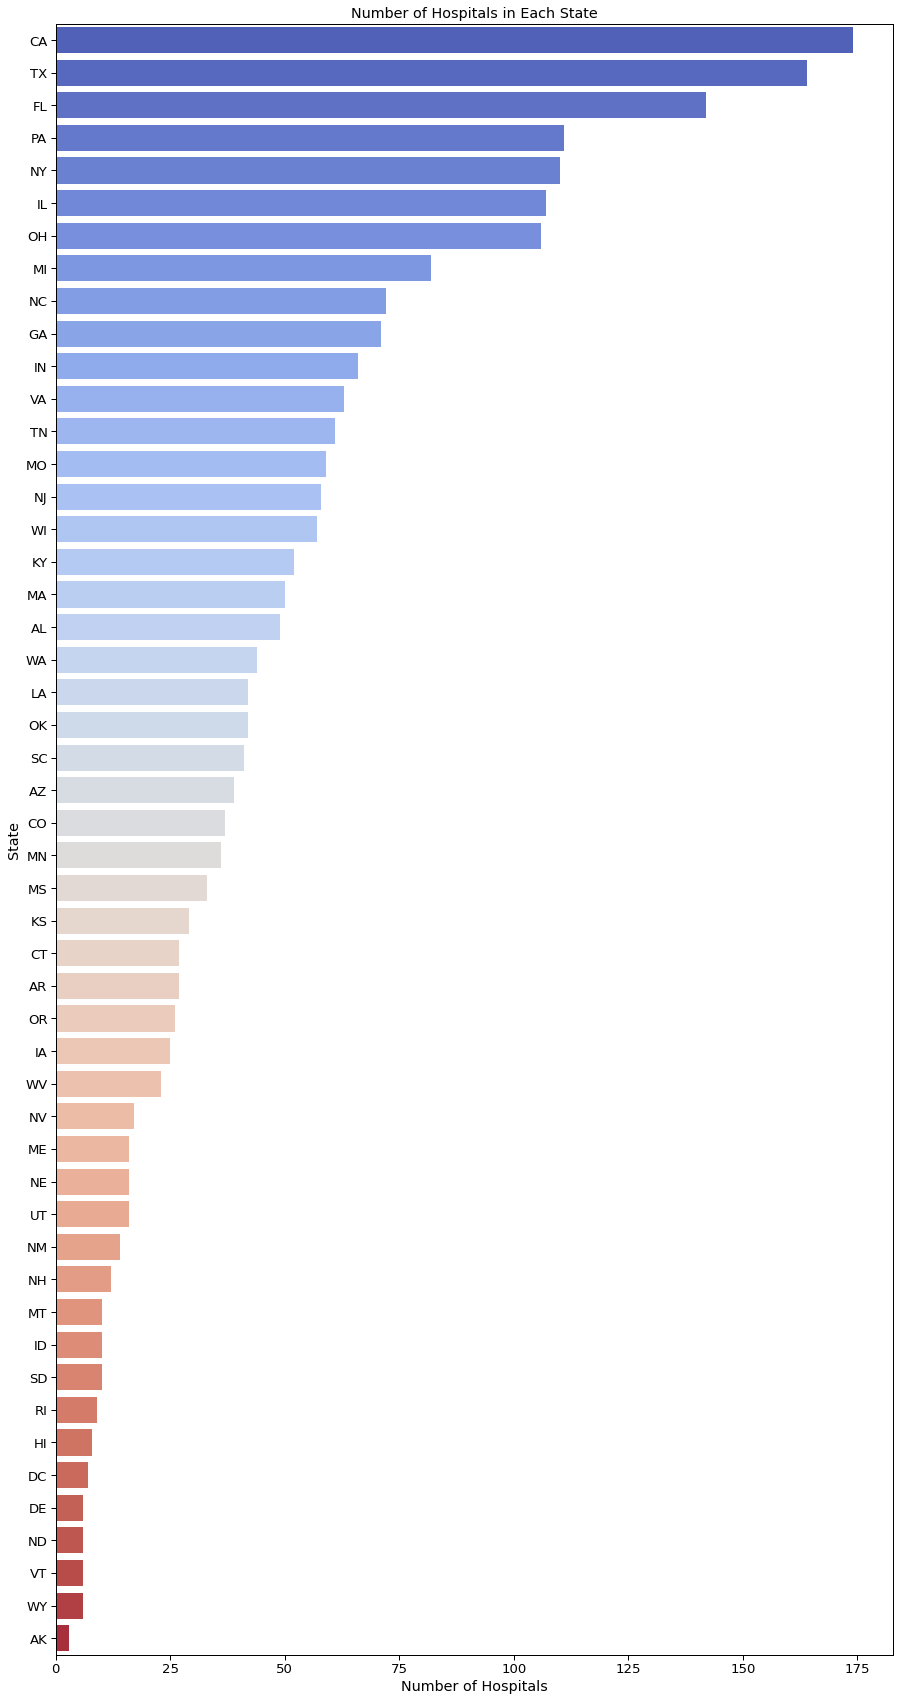

In [61]:
plt.figure(figsize=(15,30))
state_order = data["State"].value_counts().sort_values(ascending=False).index
sns.countplot(y=data["State"], palette="coolwarm", order=state_order)
plt.title("Number of Hospitals in Each State")
plt.xlabel("Number of Hospitals")

### Let's focus on the top 10 states that have the highest number of hospitals and their overall ratings. At a glance, TX has the highest number of hospitals with 5-star rating compared to the rest. In contrast, NY has the highest number of hospitals with 1-star rating compared to her counterparts. 

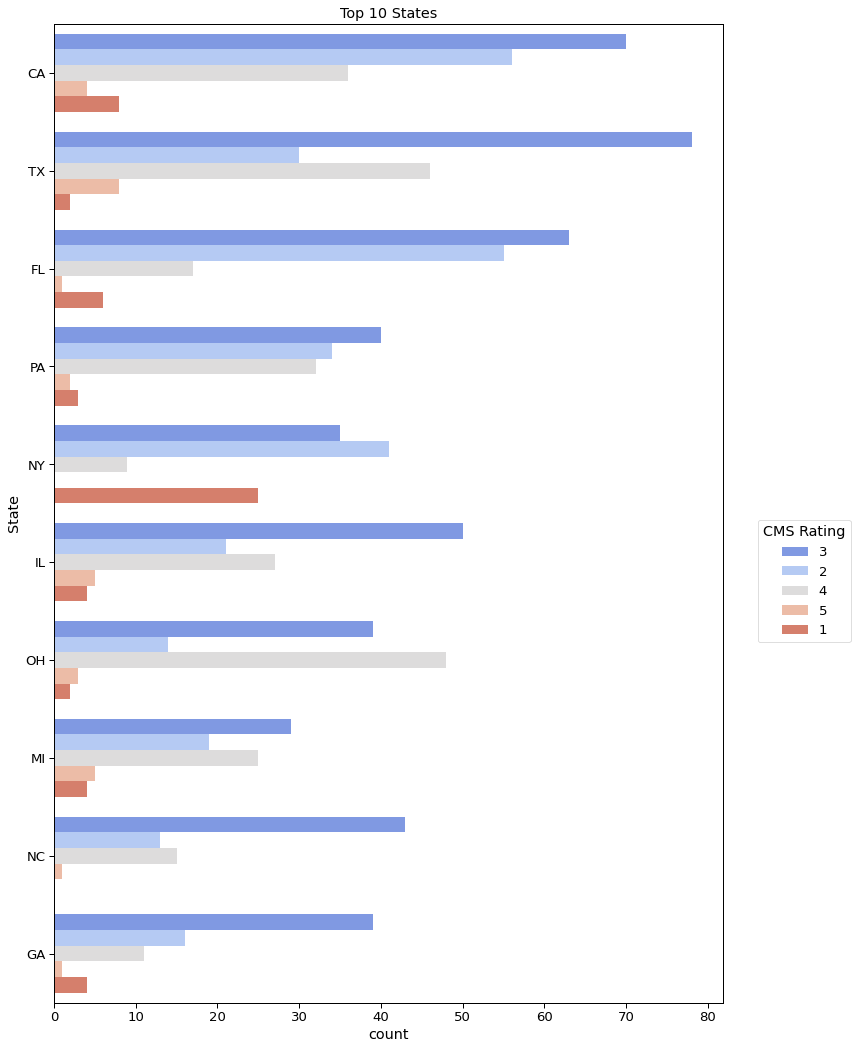

In [62]:
plt.figure(figsize=(12,18))
plt.title("Top 10 States")
state_order = data["State"].value_counts().sort_values(ascending=False)[:10].index
sns.countplot(y=data["State"], palette="coolwarm", order=state_order, data=data, hue="Hospital overall rating")
plt.legend(bbox_to_anchor=(1.2, 0.5), title="CMS Rating")

### Just out of curiousity, let's drilldown into the top 3 states.

In [63]:
len(data[data["State"] == "TX"])

164

In [64]:
data[data["State"] == "TX"]["Hospital overall rating"].value_counts()

3    78
4    46
2    30
5     8
1     2
Name: Hospital overall rating, dtype: int64

In [65]:
len(data[data["State"] == "NY"])

110

In [66]:
data[data["State"] == "NY"]["Hospital overall rating"].value_counts()

2    41
3    35
1    25
4     9
Name: Hospital overall rating, dtype: int64

In [67]:
len(data[data["State"] == "CA"])

174

In [68]:
data[data["State"] == "CA"]["Hospital overall rating"].value_counts()

3    70
2    56
4    36
1     8
5     4
Name: Hospital overall rating, dtype: int64

In [69]:
len(data["Hospital overall rating"])

2297

In [70]:
data["Hospital overall rating"].value_counts()

3    1048
4     577
2     519
1      94
5      59
Name: Hospital overall rating, dtype: int64

# There are a total of 59 hospitals with 5-star rating out of total 2297 hospitals in the USA (after data cleansing). 

#  Fun fact: Given the dataset, the probability of picking a 5-star rating hospital in the USA is 2.57%.

In [71]:
high_star_prob = 59/len(data["Hospital overall rating"])*100
high_star_prob

2.5685676969960816

# #Fun fact: Given the dataset, the probability of picking a 1-star rating hospital in the USA is 4.1%.

In [72]:
low_star_prob = 94/len(data["Hospital overall rating"])*100
low_star_prob

4.092294296909012

# Fun fact: Given the dataset, the probability of picking a 5-star rating hospital in the USA that is from Texas  is 0.35%.

In [73]:
texas_high_prob = (8/164)
texas_usa_prob = (164/2297)
texas_high_usa_prob = (texas_high_prob*texas_usa_prob)*100
texas_high_usa_prob               

0.34828036569438403

# Fun fact: Given the dataset, the probability of picking a 1-star rating hospital in the USA that is from New York  is 1.1%.

In [74]:
newyork_low_prob = 25/110 
newyork_usa_prob = 110/2297
newyork_low_usa_prob = (newyork_low_prob*newyork_usa_prob)*100
newyork_low_usa_prob

1.0883761427949499

# It's time to look into the data type and prepare for machine learning. Noted that all are objects except for ZIP code. 

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 4784
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   State                                                 2297 non-null   object
 1   Hospital Type                                         2297 non-null   object
 2   Hospital Ownership                                    2297 non-null   object
 3   Emergency Services                                    2297 non-null   object
 4   Hospital overall rating                               2297 non-null   object
 5   Mortality national comparison                         2297 non-null   object
 6   Safety of care national comparison                    2297 non-null   object
 7   Readmission national comparison                       2297 non-null   object
 8   Patient experience national comparison                2297 non-null 

# Getting dummy data on features

In [76]:
clean_state = pd.get_dummies(data["State"], prefix="State_", drop_first=True, dtype=int)
data = pd.concat([data.drop("State", axis=1), clean_state], axis=1)

In [77]:
data.head(3)

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,...,State__SD,State__TN,State__TX,State__UT,State__VA,State__VT,State__WA,State__WI,State__WV,State__WY
0,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,Same as the national average,Above the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,...,0,0,0,0,0,0,0,0,0,0
1,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,...,0,0,0,0,0,0,0,0,0,0
2,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average,...,0,0,0,0,0,0,0,0,0,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 4784
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Hospital Type                                         2297 non-null   object
 1   Hospital Ownership                                    2297 non-null   object
 2   Emergency Services                                    2297 non-null   object
 3   Hospital overall rating                               2297 non-null   object
 4   Mortality national comparison                         2297 non-null   object
 5   Safety of care national comparison                    2297 non-null   object
 6   Readmission national comparison                       2297 non-null   object
 7   Patient experience national comparison                2297 non-null   object
 8   Effectiveness of care national comparison             2297 non-null 

In [79]:
dummy_column = data.iloc[:, 0:3]

In [80]:
clean_column = pd.get_dummies(dummy_column, drop_first=True, dtype=int)
data = pd.concat([data.drop(dummy_column, axis=1), clean_column], axis=1)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 4784
Data columns (total 67 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Hospital overall rating                                         2297 non-null   object
 1   Mortality national comparison                                   2297 non-null   object
 2   Safety of care national comparison                              2297 non-null   object
 3   Readmission national comparison                                 2297 non-null   object
 4   Patient experience national comparison                          2297 non-null   object
 5   Effectiveness of care national comparison                       2297 non-null   object
 6   Timeliness of care national comparison                          2297 non-null   object
 7   Efficient use of medical imaging national comparison        

In [82]:
dummy_columns = data.iloc[:, 1:8]

In [83]:
clean_columns = pd.get_dummies(dummy_columns, drop_first=True, dtype=int)
data = pd.concat([data.drop(dummy_columns, axis=1), clean_columns], axis=1)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 4784
Data columns (total 74 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Hospital overall rating                                                            2297 non-null   object
 1   State__AL                                                                          2297 non-null   int64 
 2   State__AR                                                                          2297 non-null   int64 
 3   State__AZ                                                                          2297 non-null   int64 
 4   State__CA                                                                          2297 non-null   int64 
 5   State__CO                                                                          2297 non-null   int64 
 6   

# Our y-variable("Hospital overall rating) will be converted from object to int. 

In [85]:
data["Hospital overall rating"] = data["Hospital overall rating"].astype(str).astype(int)

# Binary Classification on "Hospital overall rating"

# I received an error at the end of this project that sklearn.metrics does not support multiclass output (it works on my Jupyter notebook). So, the multiclass rating will be converted to binary classification: 0 = low to average; 1 = above average and high. The followings will be mapped: Rating 1,2, and 3 will be converted to 0. Rating 4 and 5 above

In [86]:
data["Hospital overall rating"] = data["Hospital overall rating"].map({1:0, 2:0, 3:0, 4:1, 5:1})

In [87]:
data["Hospital overall rating"].value_counts()

0    1661
1     636
Name: Hospital overall rating, dtype: int64

In [88]:
data.describe()

,Hospital overall rating,State__AL,State__AR,State__AZ,State__CA,State__CO,State__CT,State__DC,State__DE,State__FL,...,Readmission national comparison_Below the national average,Readmission national comparison_Same as the national average,Patient experience national comparison_Below the national average,Patient experience national comparison_Same as the national average,Effectiveness of care national comparison_Below the national average,Effectiveness of care national comparison_Same as the national average,Timeliness of care national comparison_Below the national average,Timeliness of care national comparison_Same as the national average,Efficient use of medical imaging national comparison_Below the national average,Efficient use of medical imaging national comparison_Same as the national average
count,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.00000,...,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000
mean,0.276883,0.021332,0.011754,0.016979,0.075751,0.016108,0.011754,0.003047,0.002612,0.06182,...,0.328254,0.353069,0.378320,0.333478,0.063561,0.883761,0.353069,0.413148,0.133217,0.711798
std,0.447556,0.144521,0.107802,0.129219,0.264657,0.125918,0.107802,0.055132,0.051053,0.24088,...,0.469680,0.478028,0.485074,0.471558,0.244023,0.320581,0.478028,0.492506,0.339883,0.453024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Importing sci-kit learn libraries. Preprocessing scalar is not necessary as all in 0s and 1s. The data will be split into training set and test. 

In [89]:
from sklearn.model_selection import train_test_split

# Creating variables for X and y. Our target is to predict hospital rating, thus, our y variable is "Hospital overal rating". The rest will be our X variable.

In [90]:
X = data.drop("Hospital overall rating", axis=1)
y = data["Hospital overall rating"]

# Setting data for training at 80%, test data at 20%. Random state will be used so it will produce the same random sequence each time. An arbitrary number 42 will be used as the random state (I heard it is THE number for Life, universe, and everything :)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-nearest neighbor

## K-nearest neighbor - a random number for the K-value or the n_neighbors of 10 will be used.

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
neighbor = KNeighborsClassifier(n_neighbors=10)

In [94]:
neighbor.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [95]:
neighbor_predict = neighbor.predict(X_test)

#  Training and prediction complete. Now let's evaluate

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(confusion_matrix(y_test, neighbor_predict))
print(classification_report(y_test, neighbor_predict))

[[315  19]
 [ 52  74]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       334
           1       0.80      0.59      0.68       126

    accuracy                           0.85       460
   macro avg       0.83      0.77      0.79       460
weighted avg       0.84      0.85      0.84       460



## The accurate is 85% with n_neighbors set as 10, which was a random number. Noted that recall value on 1 is only 0.59 and the F1-score is only 68%. However, we have to consider the imbalanced data - the test size for 1 (the better rating group) is only about 30% of the dataset.  

###### Now I will try to optimize the model by finding the best K-value in range 1 to 40, which is also arbitrary, and see if we can improve the score.  

In [98]:
error_rate = []

for i in range(1,40):
    neighbor = KNeighborsClassifier(n_neighbors = i)
    neighbor.fit(X_train, y_train)
    knnpredict = neighbor.predict(X_test)
    error_rate.append(np.mean(knnpredict != y_test))

### The graph below shows the error rate trend in the elbow method. Noted that K-value 10 to 40 gives as a steady trend, hovering from 0.14 to 0.16 error rate. It is logical to pick the K-value that gives us the lowest error rate. In this case, I will pick 19 since it is the starting point of downtrend. N_neighbors will be set at 19 and retraint he model.

Text(0, 0.5, 'Error Rate')

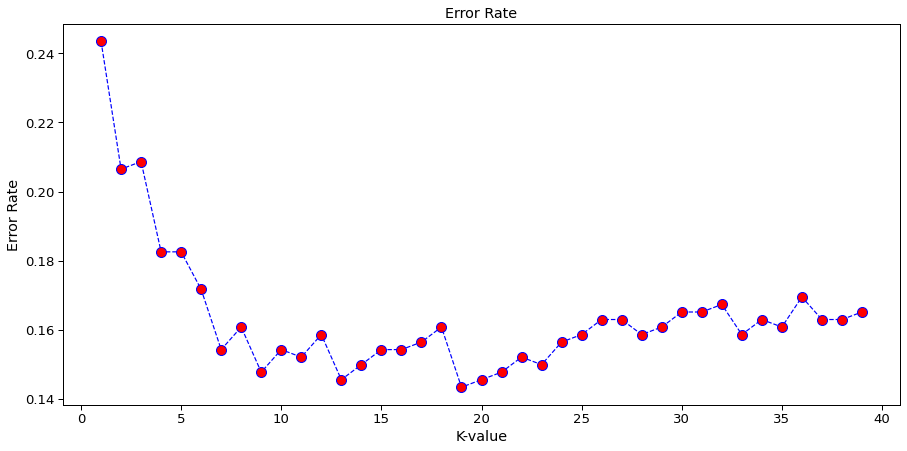

In [99]:
plt.figure(figsize=(15,7))
plt.plot(range(1,40), error_rate, color="blue", ls="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate")
plt.xlabel("K-value")
plt.ylabel("Error Rate")

In [100]:
neighbor = KNeighborsClassifier(n_neighbors=19)
neighbor.fit(X_train, y_train)
knnpredict = neighbor.predict(X_test)

In [101]:
print(classification_report(y_test, knnpredict))
print(confusion_matrix(y_test, knnpredict))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       334
           1       0.79      0.64      0.71       126

    accuracy                           0.86       460
   macro avg       0.83      0.79      0.81       460
weighted avg       0.85      0.86      0.85       460

[[313  21]
 [ 45  81]]


### The KNN model using elbow method resulted in a slight increase in accuracy, from 85% to 86%. The recall and f1-score on 1 has improved as well, which is much better than before IMO. Moving on to Support Vector Machines, which I think it is a close counterpart to KNN. 

## Support Vector Machines

In [102]:
from sklearn.svm import SVC

In [103]:
support = SVC(random_state=42)

In [104]:
support.fit(X_train, y_train)

SVC(random_state=42)

In [105]:
support_predict = support.predict(X_test)

In [106]:
print(classification_report(y_test, support_predict))
print(confusion_matrix(y_test, support_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       334
           1       0.79      0.73      0.76       126

    accuracy                           0.87       460
   macro avg       0.85      0.83      0.84       460
weighted avg       0.87      0.87      0.87       460

[[310  24]
 [ 34  92]]


### The SVM model yields 87% accuracy. Noted that it has 90% precision on rating 0 but only 79% on 1. The weighted average is 87% across the board. 

## Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
random_forest = RandomForestClassifier(n_estimators=300, bootstrap=True, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [109]:
random_forest_predict = random_forest.predict(X_test)

In [110]:
print(classification_report(y_test, random_forest_predict))
print(confusion_matrix(y_test, random_forest_predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       334
           1       0.79      0.67      0.72       126

    accuracy                           0.86       460
   macro avg       0.83      0.80      0.81       460
weighted avg       0.85      0.86      0.85       460

[[311  23]
 [ 42  84]]


### The Random Forest model yields a 86% accuracy with 79% precision and 67% recall on 1. 

In [111]:
report = [["Support Vector Machines", 0.87, 0.87, 0.87, 0.87], ["Random Forest", 0.86, 0.85, 0.86, 0.85], 
          ["K-nearest neighbor", 0.86, 0.85, 0.86, 0.85]]
overall_result = pd.DataFrame(report, columns=["Model", "Accuracy Score", "Precision", "Recall", "F1-score"])
overall_result.sort_values("F1-score", ascending=False)

,Model,Accuracy Score,Precision,Recall,F1-score
0,Support Vector Machines,0.87,0.87,0.87,0.87
1,Random Forest,0.86,0.85,0.86,0.85
2,K-nearest neighbor,0.86,0.85,0.86,0.85


# Overall, SVM yields the highest accuracy and F1-score, followed by Random Forest, and K-nearest neighbor. I believe the model can be better if dataset for 0s and 1s are more balanced (recalling the majority of rating of 3 was the majority and accounts for almost 50%). This is an interesting personal project. 